## Statistical Analysis 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read the mouse data and the study results
final_mean_df = pd.read_csv('Resources/final_mean_df.csv')

# Display the data table for preview
final_mean_df.head()

,Unnamed: 0,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income Total ($) billions,GDP Total ($) billions,Consumer Price Inflation (% Annual)
0,0,Albania,ALB,Europe,5.20,79.00,4.60,14.00,10.95,13.37,0.00
1,1,Algeria,DZA,Africa,5.12,75.93,2.56,10.54,134.99,168.56,0.03
2,2,Armenia,ARM,Europe,5.40,74.90,4.06,18.17,10.39,11.74,0.00
3,3,Australia,AUS,Asia,7.16,82.60,12.68,5.56,"1,040.77","1,340.84",0.27
4,4,Austria,AUT,Europe,7.16,81.61,15.44,5.31,340.09,418.94,0.08


In [14]:
# remove column
final_mean_df = final_mean_df.drop(columns=['Unnamed: 0'])
final_mean_df.head()

,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income Total ($) billions,GDP Total ($) billions,Consumer Price Inflation (% Annual)
0,Albania,ALB,Europe,5.20,79.00,4.60,14.00,10.95,13.37,0.00
1,Algeria,DZA,Africa,5.12,75.93,2.56,10.54,134.99,168.56,0.03
2,Armenia,ARM,Europe,5.40,74.90,4.06,18.17,10.39,11.74,0.00
3,Australia,AUS,Asia,7.16,82.60,12.68,5.56,"1,040.77","1,340.84",0.27
4,Austria,AUT,Europe,7.16,81.61,15.44,5.31,340.09,418.94,0.08


In [15]:
# Remove scientific notation
pd.options.display.float_format = '{:,.2f}'.format

In [16]:
final_mean_df.head()

,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income Total ($) billions,GDP Total ($) billions,Consumer Price Inflation (% Annual)
0,Albania,ALB,Europe,5.20,79.00,4.60,14.00,10.95,13.37,0.00
1,Algeria,DZA,Africa,5.12,75.93,2.56,10.54,134.99,168.56,0.03
2,Armenia,ARM,Europe,5.40,74.90,4.06,18.17,10.39,11.74,0.00
3,Australia,AUS,Asia,7.16,82.60,12.68,5.56,"1,040.77","1,340.84",0.27
4,Austria,AUT,Europe,7.16,81.61,15.44,5.31,340.09,418.94,0.08


In [17]:
# create a new dataframe with sorted happiness score
sorted_happiness = final_mean_df.sort_values('Happiness Score')
sorted_happiness = sorted_happiness.reset_index(drop=True)
sorted_happiness.head()

,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income Total ($) billions,GDP Total ($) billions,Consumer Price Inflation (% Annual)
0,Rwanda,RWA,Africa,3.27,65.93,5.64,1.13,7.45,9.30,0.00
1,Botswana,BWA,Africa,3.47,65.38,17.54,21.57,12.30,15.69,0.00
2,Lesotho,LSO,Africa,3.51,52.87,81.34,23.15,2.22,2.36,0.00
3,Tanzania,TZA,Africa,3.70,65.91,4.22,2.18,45.99,53.72,0.01
4,Malawi,MWI,Africa,3.75,62.79,5.84,5.79,7.01,8.33,0.00


In [18]:
# create a new dataframe with sorted suicide rate
sorted_suicide = final_mean_df.sort_values('Suicide Rate')
sorted_suicide = sorted_suicide.reset_index(drop=True)
sorted_suicide.head()

,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income Total ($) billions,GDP Total ($) billions,Consumer Price Inflation (% Annual)
0,Jordan,JOR,Asia,4.15,75.51,1.54,16.32,38.63,41.69,0.01
1,Philippines,PHL,Asia,5.90,71.55,2.22,2.58,339.10,335.44,0.06
2,Jamaica,JAM,Americas,5.85,71.98,2.28,11.02,13.28,14.93,0.00
3,Indonesia,IDN,Asia,5.24,70.06,2.40,4.14,783.16,993.94,0.17
4,Honduras,HND,Americas,6.02,72.69,2.44,5.95,20.00,23.00,0.00


In [19]:
# prepare df for plotting by selecting appropriate columns and rows as well as setting new index
x = sorted_happiness[['Country Name', 'Happiness Score']].tail(25)
x =  x.iloc[:25]
x.set_index(['Country Name'], inplace=True)
x.head()

,Happiness Score
Country Name,
Uruguay,6.47
Spain,6.48
Romania,6.48
Singapore,6.48
Saudi Arabia,6.52


<AxesSubplot:ylabel='Country Name'>

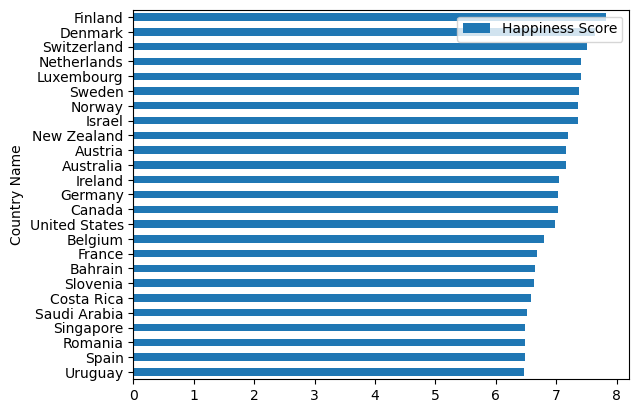

In [20]:
# plot 20 countries with highest happiness scores
x.plot(kind='barh')

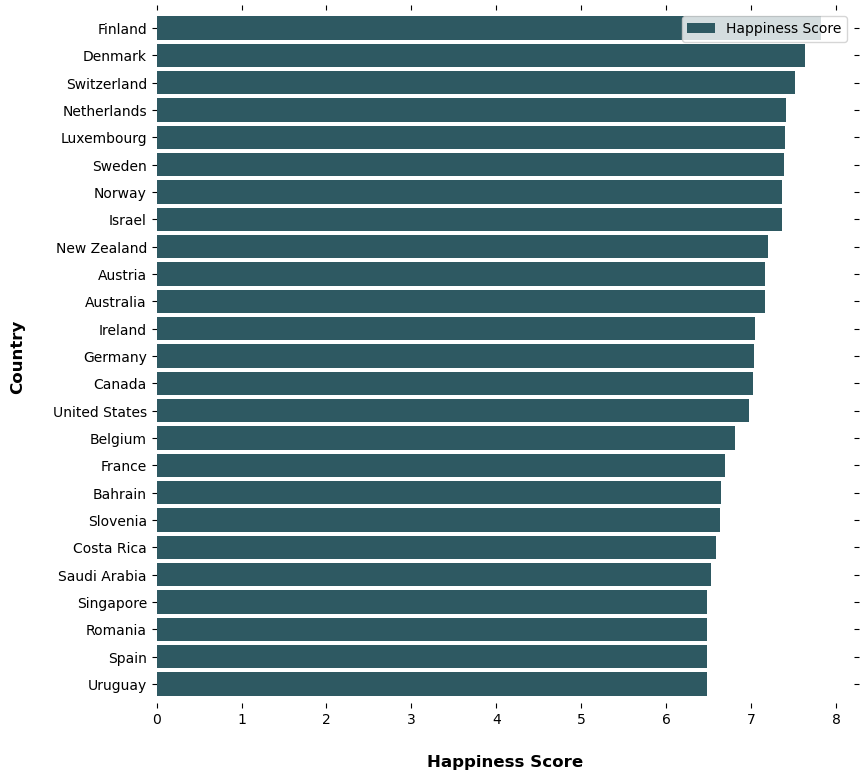

In [21]:
ax = x.plot(kind='barh', figsize=(9, 9), color='#2e5962', zorder=2, width=0.85)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# remove ticks 
ax.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='on', left='off', right='off', labelleft='on')

# x-axis label
ax.set_xlabel('Happiness Score', labelpad=20, weight='bold', size=12)

# y-axis label
ax.set_ylabel('Country', labelpad=20, weight='bold', size=12)

# save fig
plt.savefig('output/top_25_happiness.png', bbox_inches='tight', dpi=600)
plt.show()

In [22]:
# prepare df for plotting by selecting appropriate columns and rows as well as setting new index
y = sorted_suicide[['Country Name', 'Suicide Rate']].tail(25)
y =  y.iloc[:25]
y.set_index(['Country Name'], inplace=True)
y.head(25)

,Suicide Rate
Country Name,
Switzerland,14.54
France,14.66
Sweden,14.98
Moldova,15.22
Finland,15.32
United States,15.44
Austria,15.44
Estonia,16.10
Croatia,16.50


<AxesSubplot:ylabel='Country Name'>

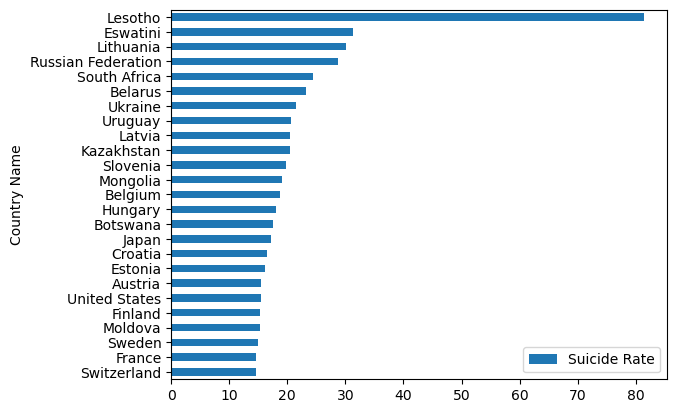

In [23]:
# plot 20 countries with highest happiness scores
y.plot(kind='barh')

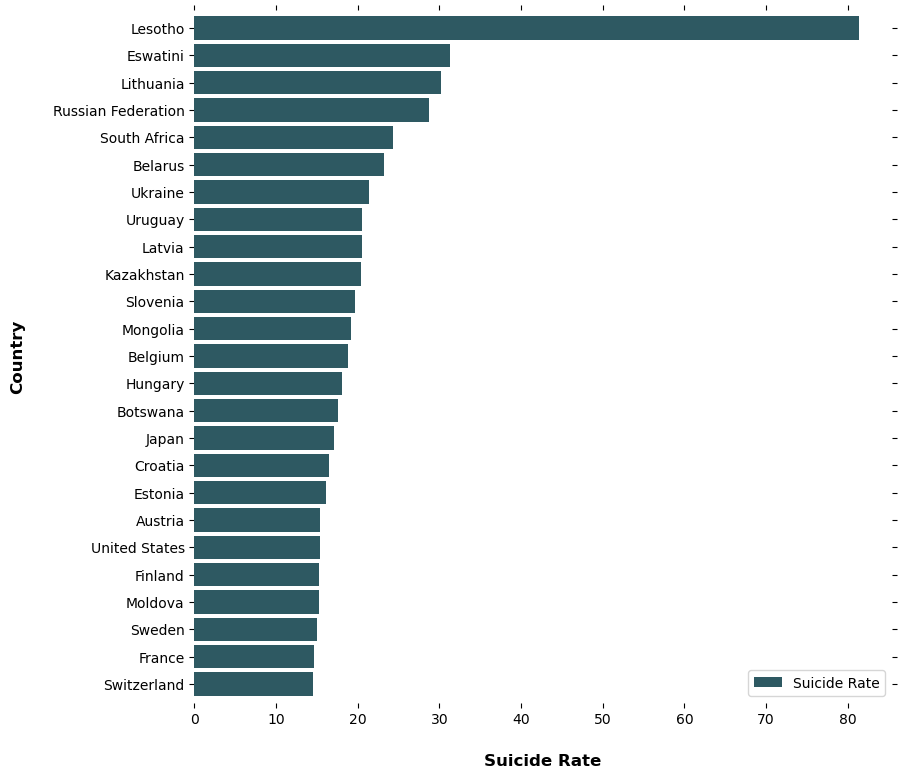

In [24]:
ay = y.plot(kind='barh', figsize=(9, 9), color='#2e5962', zorder=2, width=0.85)

# remove spines
ay.spines['right'].set_visible(False)
ay.spines['top'].set_visible(False)
ay.spines['left'].set_visible(False)
ay.spines['bottom'].set_visible(False)

# remove ticks 
ay.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='on', left='off', right='off', labelleft='on')

# x-axis label
ay.set_xlabel('Suicide Rate', labelpad=20, weight='bold', size=12)

# y-axis label
ay.set_ylabel('Country', labelpad=20, weight='bold', size=12)

# save fig
plt.savefig('output/top_25_suicide.png', bbox_inches='tight', dpi=600)
plt.show()